In [472]:
import numpy as np 
import scipy.stats as ss 
import random
import matplotlib.pyplot as plt 

In [473]:
p1 = np.array([1,1])
p2 = np.array([4,4])   

In [474]:
def distance(p1, p2):
    """Finds the Euclidean distance between two points"""
    return np.sqrt(np.sum(np.power(p1 - p2, 2)))

In [475]:
def majority_vote(votes):
    """Returns the mode of raw arbitrary data"""
    vote_counts = {}

    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1

    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
    return random.choice(winners)

In [476]:
votes = [1,2,3,1,2,3,1,2,3,]
vote_counts = majority_vote(votes)
vote_counts

2

In [477]:
def mode(votes):
    """Returns the mode of raw arbitrary data"""
    mode, count =  ss.mstats.mode(votes)
    return mode
mode(votes)

array([1.])

In [478]:
def find_nearest_neighbors(p, points, k=5):
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

In [479]:
p = np.array([2.5, 1.5])
points = np.array([[1,1], [2,2], [3,3]])
outcomes = np.array([0, 0, 1])

print(points[find_nearest_neighbors(p, points, k=2)])

[[2 2]
 [1 1]]


In [480]:
def knn_predict(p, points, outcomes, k = 5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

In [481]:
knn_predict(p, points, outcomes, 3)

0

In [482]:
def generate_synth_data(n=50):
    """Creates two sets of points from bivriate normal distribution"""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))
    return(points, outcomes)
    

In [483]:
n = 20
points, outcomes = generate_synth_data(20)

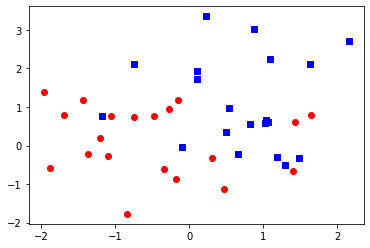

In [484]:
plt.figure()
plt.plot(points[:n, 0], points[:n, 1], 'ro')
plt.plot(points[n:, 0], points[n:, 1], 'bs')

In [485]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """Classify each point on the prediction grid"""
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)

    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x, y])
            prediction_grid[j, i] = knn_predict(p, predictors, outcomes, k)

    return (xx, yy, prediction_grid)

In [486]:
def plot_prediction_grid (xx, yy, prediction_grid):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    

In [487]:
(predictors, outcomes) = generate_synth_data()

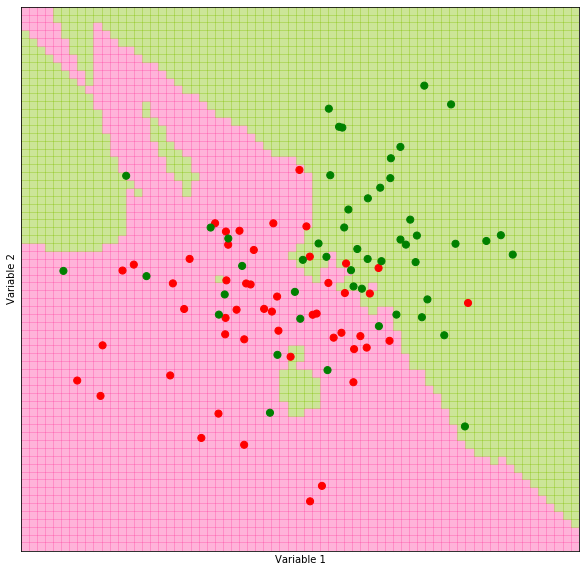

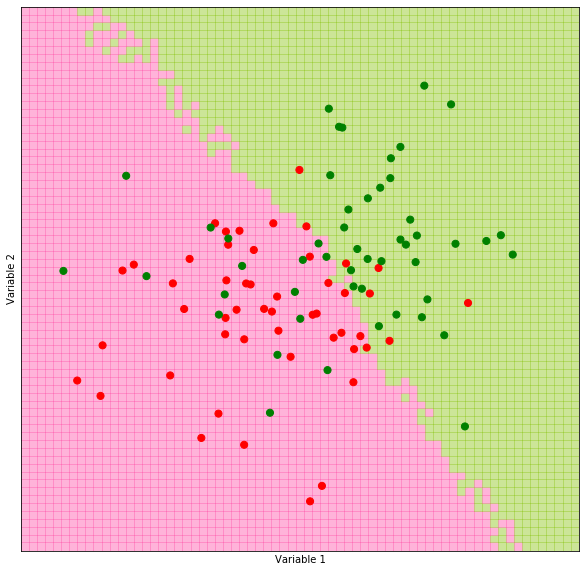

In [488]:
k = 5; limits = (-3, 4, -3 ,4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h ,k)
plot_prediction_grid(xx, yy, prediction_grid)


k = 50; limits = (-3, 4, -3 ,4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h ,k)
plot_prediction_grid(xx, yy, prediction_grid)